In [1]:
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np 
import GPy
import torch
from __future__ import absolute_import, division, print_function
import torch
from torch.distributions import constraints
from torch.nn import Parameter
import pyro
from pyro.contrib.gp.util import Parameterized
import pyro.distributions as dist
import pyro.infer as infer
import pyro.optim as optim
from pyro.params import param_with_module_name
import pyro.contrib.gp as gp
import pyro.distributions as dist
import matplotlib.pyplot as plt
pyro.clear_param_store()
import tensorflow as tf
import numpy as np 
import pandas as pd
import numpy
import math
import cProfile
import time
import GPy
import numpy as np
from matplotlib import pyplot as plt

import statsmodels.api as sm
import sympy as sp
#import pymc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.special import gamma
from GPy.core.parameterization.variational import NormalPosterior, NormalPrior

from sympy.interactive import printing
import pyro.contrib.gp.models.vsgp as vsgp
from GPy.util.linalg import pdinv
from pyro.infer.mcmc.hmc import HMC
from pyro.infer.mcmc import MCMC
from matplotlib import pyplot
pyro.clear_param_store()
import time
torch.manual_seed(12)
pyro.set_rng_seed(101)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np 
import gpflow
from PIL import Image
from skimage import io, img_as_float, img_as_uint
from skimage.measure import compare_ssim as ssim
from scipy.linalg import norm
from scipy import sum, average
import numpy
import PIL

In [2]:
M1 = pickle.load( open( "savefit-DTC40.p", "rb" ) )
M2 = pickle.load( open( "savefit-FITC40.p", "rb" ) ) 
M3 = pickle.load( open( "savefit-vfe40.p", "rb" ) ) 
M4= pickle.load(open( "savefit-vfe40m2final.p", "rb" ) ) 

In [3]:
X = np.load('datasets/X.npy')
Y = np.load('datasets/Y.npy')
N = X.shape[0]
sample_mean = np.mean(X[:N,:])
sample_std = np.std(X[:N,:])
sample_norm = (X[:N,:] - sample_mean)/sample_std # normalisation
X_flat = np.array(sample_norm).reshape((2062, 64*64))

In [4]:
M1 = M1[0]
M2 = M2[0]
M3 = M3[0]
M4 = M4[0]
X_back1,X_var1 = M1.base_model.forward(Xnew=M1.get_param('X_loc'))
X_back2,X_var2 =  M2.base_model.forward(Xnew=M2.get_param('X_loc'))
X_back3,X_var3 =  M3.base_model.forward(Xnew=M3.get_param('X_loc'))
X_back4,X_var4 =  M4.predict(M4.X.mean)
X_back1 = X_back1.detach().numpy().T
X_back2 = X_back2.detach().numpy().T
X_back3 = X_back3.detach().numpy().T

In [5]:
PCA_rec = pickle.load(open("PCA_recovered.p", "rb" ) ) 

In [6]:
GPLVM15 = pickle.load(open("GPLVM15.p" ,"rb" ) ) 

In [7]:
GPLVM15 = GPLVM15[0]

In [8]:
X_back5,X_var5 = GPLVM15.predict(GPLVM15.X)

In [9]:
PCA_rec = PCA_rec[0]

In [10]:
KPCA_rec = pickle.load(open("KPCA_recovered.p", "rb" ) ) 

In [11]:
KPCA_rec = KPCA_rec[0]

In [12]:
new_model = pickle.load( open( "savefit-modelparametersMCMCL10.p", "rb" ) ) 
X_back6 = new_model[1][0]

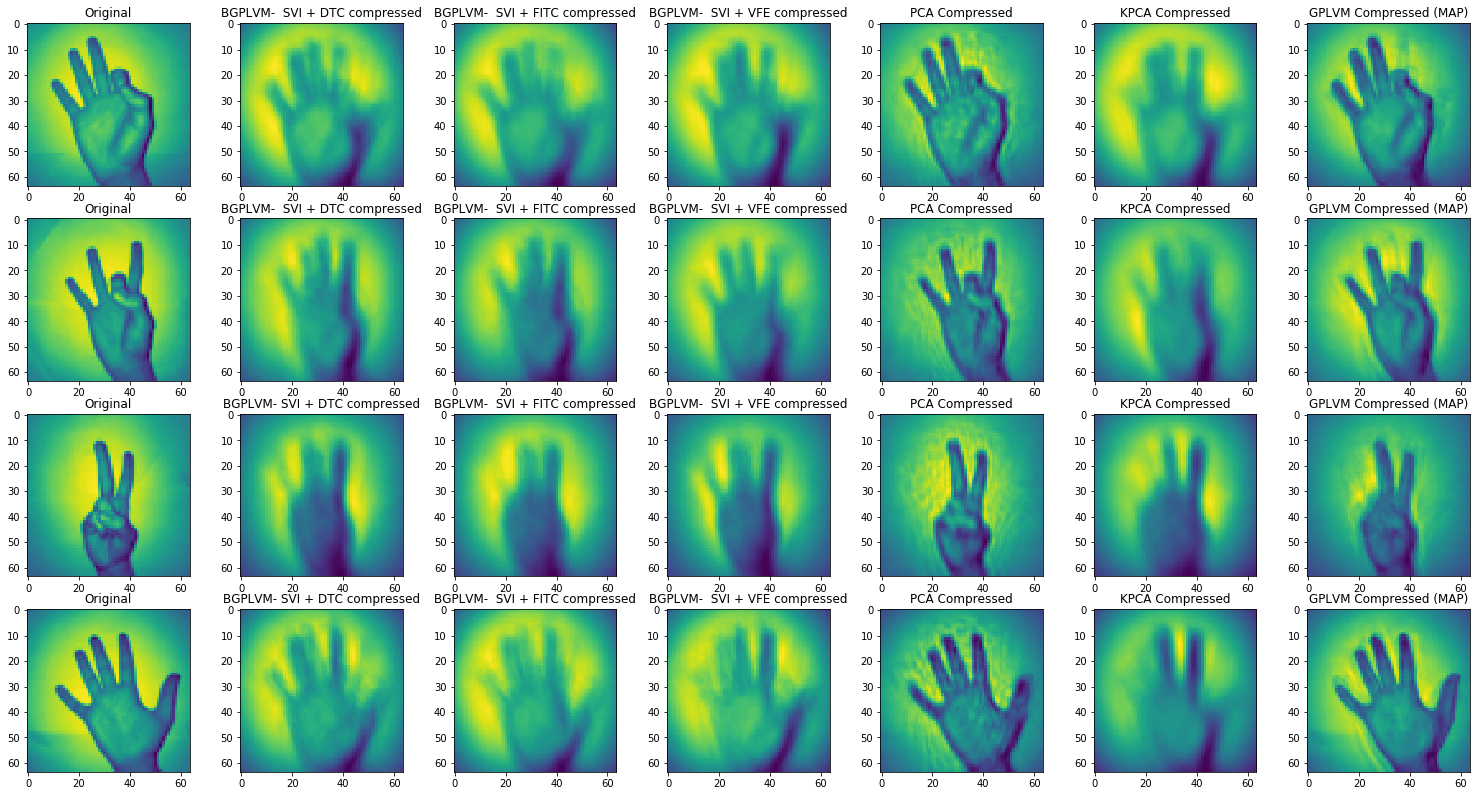

In [63]:
f = plt.figure()
f.add_subplot(4,7 ,1)
plt.title("Original")
plt.imshow(X_flat[10].reshape((64,64)))
f.add_subplot(4,7, 2)
plt.title("BGPLVM-  SVI + DTC compressed")
plt.imshow(X_back1[10].reshape((64,64)))
f.add_subplot(4,7, 3)
plt.title("BGPLVM-  SVI + FITC compressed")
plt.imshow(X_back2[10].reshape((64,64)))
f.add_subplot(4,7, 4)
plt.title("BGPLVM-  SVI + VFE compressed")
plt.imshow(X_back3[10].reshape((64,64)))
f.add_subplot(4,7, 5)
plt.title("PCA Compressed")
plt.imshow(PCA_rec[10].reshape((64,64)))
f.add_subplot(4,7, 6)
plt.title("KPCA Compressed")
plt.imshow(KPCA_rec[10].reshape((64,64)))

f.add_subplot(4,7, 7)
plt.title("GPLVM Compressed (MAP)")
plt.imshow(X_back5[10].reshape((64,64)))


f.add_subplot(4,7 ,8)
plt.title("Original")
plt.imshow(X_flat[1125].reshape((64,64)))
f.add_subplot(4,7 ,9)
plt.title("BGPLVM-  SVI + DTC compressed")
plt.imshow(X_back1[1125].reshape((64,64)))
f.add_subplot(4,7 ,10)
plt.title("BGPLVM-  SVI + FITC compressed")
plt.imshow(X_back2[1125].reshape((64,64)))
f.add_subplot(4,7 ,11)
plt.title("BGPLVM-  SVI + VFE compressed")
plt.imshow(X_back3[25].reshape((64,64)))
f.add_subplot(4,7 ,12)
plt.title("PCA Compressed")
plt.imshow(PCA_rec[1125].reshape((64,64)))
f.add_subplot(4,7 ,13)
plt.title("KPCA Compressed")
plt.imshow(KPCA_rec[1125].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)
f.add_subplot(4,7 ,14)
plt.title("GPLVM Compressed (MAP)")
plt.imshow(X_back5[1125].reshape((64,64)))



f.add_subplot(4,7 ,15)
plt.title("Original")
plt.imshow(X_flat[1825].reshape((64,64)))
f.add_subplot(4,7 ,16)
plt.title("BGPLVM- SVI + DTC compressed")
plt.imshow(X_back1[1825].reshape((64,64)))
f.add_subplot(4,7 ,17)
plt.title("BGPLVM-  SVI + FITC compressed")
plt.imshow(X_back2[1825].reshape((64,64)))
f.add_subplot(4,7 ,18)
plt.title("BGPLVM-  SVI + VFE compressed")
plt.imshow(X_back3[1825].reshape((64,64)))
f.add_subplot(4,7 ,19)
plt.title("PCA Compressed")
plt.imshow(PCA_rec[1825].reshape((64,64)))
f.add_subplot(4,7 ,20)
plt.title("KPCA Compressed")
plt.imshow(KPCA_rec[1825].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)
f.add_subplot(4,7 ,21)
plt.title("GPLVM Compressed (MAP)")
plt.imshow(X_back5[1825].reshape((64,64)))




f.add_subplot(4,7 ,22)
plt.title("Original")
plt.imshow(X_flat[1925].reshape((64,64)))
f.add_subplot(4,7 ,23)
plt.title("BGPLVM- SVI + DTC compressed")
plt.imshow(X_back1[1925].reshape((64,64)))
f.add_subplot(4,7 ,24)
plt.title("BGPLVM-  SVI + FITC compressed")
plt.imshow(X_back2[1925].reshape((64,64)))
f.add_subplot(4,7 ,25)
plt.title("BGPLVM-  SVI + VFE compressed")
plt.imshow(X_back3[1925].reshape((64,64)))
f.add_subplot(4,7 ,26)
plt.title("PCA Compressed")
plt.imshow(PCA_rec[1925].reshape((64,64)))
f.add_subplot(4,7 ,27)
plt.title("KPCA Compressed")
plt.imshow(KPCA_rec[1925].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)
f.add_subplot(4,7 ,28)
plt.title("GPLVM Compressed (MAP)")
plt.imshow(X_back5[1925].reshape((64,64)))

plt.subplots_adjust(bottom=0.4, right=3.5, top=3)
#f.add_subplot(4,4, 8)
#plt.title("Bayesian GPLVM MCMC Compressed")
#plt.imshow(X_back6[101].reshape((64,64))) #28,31,50
#plt.subplots_adjust(bottom=0.1, right=2, top=3)
#f.add_subplot(4,4, 9)
#plt.title("Original")
#plt.imshow(X_flat[42].reshape((64,64)))
#f.add_subplot(4,4, 10)
#plt.title("Bayesian SVI + FITC")
#plt.imshow(X_back[42].reshape((64,64)))
#f.add_subplot(4,4, 11)
#plt.title("Original")
#plt.imshow(X_flat[2005].reshape((64,64)))
#f.add_subplot(4,4, 12)
#plt.title("Bayesian SVI + FITC")
#plt.imshow(X_back[2005].reshape((64,64)))
